# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [120]:
#!pip install numpy
#!pip install pandas

Import the core data science libraries:

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

#

In [122]:
df=pd.read_csv('data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20240426.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

**show 5 randomly selected rows from the data set**

In [123]:
df.sample(5)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
1185,-73.979333,40.767414,1C-PM-1013-02,01C,PM,10132018,2,Adult,Cinnamon,White,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9793334416378 40.7674142089209)
2715,-73.961809,40.794410,35A-PM-1013-03,35A,PM,10132018,3,Adult,Gray,White,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9618094076328 40.7944097368153)
1961,-73.965159,40.781184,20F-PM-1007-06,20F,PM,10072018,6,Juvenile,Gray,Cinnamon,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9651591861399 40.781183828857)
1133,-73.966747,40.776064,15H-PM-1008-01,15H,PM,10082018,1,Adult,Cinnamon,Gray,...,False,True,False,True,False,False,False,False,observant,POINT (-73.9667474482967 40.7760643720793)
1448,-73.956112,40.794944,37E-AM-1013-04,37E,AM,10132018,4,Adult,Gray,"Cinnamon, White",...,True,False,False,False,False,False,False,True,NaN,POINT (-73.9561124892063 40.7949440648632)


**show data types of each column**

In [124]:
df.dtypes

X                                             float64
Y                                             float64
Unique Squirrel ID                             object
Hectare                                        object
Shift                                          object
Date                                            int64
Hectare Squirrel Number                         int64
Age                                            object
Primary Fur Color                              object
Highlight Fur Color                            object
Combination of Primary and Highlight Color     object
Color notes                                    object
Location                                       object
Above Ground Sighter Measurement               object
Specific Location                              object
Running                                          bool
Chasing                                          bool
Climbing                                         bool
Eating                      

**find the unique variables in each column**

In [125]:
df.nunique()

X                                             3023
Y                                             3023
Unique Squirrel ID                            3018
Hectare                                        339
Shift                                            2
Date                                            11
Hectare Squirrel Number                         23
Age                                              3
Primary Fur Color                                3
Highlight Fur Color                             10
Combination of Primary and Highlight Color      22
Color notes                                    135
Location                                         2
Above Ground Sighter Measurement                41
Specific Location                              304
Running                                          2
Chasing                                          2
Climbing                                         2
Eating                                           2
Foraging                       

**Do some basic mathematical analysis for some columns**

In [126]:
df.describe()

,X,Y,Date,Hectare Squirrel Number
count,3023.000000,3023.000000,3.023000e+03,3023.000000
mean,-73.967184,40.780853,1.011949e+07,4.123718
std,0.007726,0.010285,4.246671e+04,3.096492
min,-73.981159,40.764911,1.006202e+07,1.000000
25%,-73.973102,40.771676,1.008202e+07,2.000000
50%,-73.968594,40.778166,1.012202e+07,3.000000
75%,-73.960189,40.791219,1.014202e+07,6.000000
max,-73.949722,40.800119,1.020202e+07,23.000000


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

**Delete the columns that are either useless or contain too many null cells that can not be analyzed**

In [127]:
columns_to_drop = ['X', 'Y', 'Specific Location', 'Other Activities', 'Other Interactions', 'Lat/Long']

**Drop the columns chosen above**

In [128]:
df = df.drop(columns=columns_to_drop)

**Display five random rows after the operation**

In [129]:
df.sample(5)

,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,Combination of Primary and Highlight Color,Color notes,...,Eating,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from
2565,11B-AM-1007-04,11B,AM,10072018,4,Adult,Gray,NaN,Gray+,NaN,...,True,True,False,False,False,False,False,False,False,False
2190,4G-AM-1006-03,04G,AM,10062018,3,NaN,Gray,White,Gray+White,NaN,...,False,True,False,False,False,False,False,False,True,False
1818,41C-AM-1017-01,41C,AM,10172018,1,Adult,Gray,NaN,Gray+,NaN,...,False,True,False,False,False,True,False,False,True,False
320,33I-PM-1006-07,33I,PM,10062018,7,Adult,Gray,NaN,Gray+,NaN,...,False,False,False,False,False,False,False,False,False,True
2357,2C-PM-1013-06,02C,PM,10132018,6,Adult,Gray,White,Gray+White,NaN,...,False,True,False,False,False,False,True,True,False,False


**Delete the rows that contain no values in certain columns**

In [130]:
df = df.dropna(subset=['Location', 'Age', 'Primary Fur Color'])

**Show five random selected rows after the operation**

In [131]:
df.sample(5)

,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,Combination of Primary and Highlight Color,Color notes,...,Eating,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from
1412,1A-AM-1007-01,01A,AM,10072018,1,Adult,Gray,White,Gray+White,NaN,...,False,False,False,False,False,False,True,False,True,False
2129,18C-AM-1018-01,18C,AM,10182018,1,Adult,Gray,Black,Gray+Black,NaN,...,False,False,False,False,False,False,False,False,False,False
1389,17E-AM-1017-07,17E,AM,10172018,7,Adult,Gray,NaN,Gray+,NaN,...,False,False,False,False,False,False,False,False,True,False
472,12F-PM-1007-05,12F,PM,10072018,5,Adult,Gray,White,Gray+White,NaN,...,True,True,False,False,False,False,False,False,True,False
2058,38D-PM-1006-04,38D,PM,10062018,4,Adult,Cinnamon,Gray,Cinnamon+Gray,NaN,...,False,False,False,False,False,False,False,False,False,True


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

**Find the number of squirrels in each age group**

In [132]:
df['Age'].value_counts()

Adult       2503
Juvenile     319
?              2
Name: Age, dtype: int64

**Find the number of squirrels with different fur colors**

In [133]:
grouped_analysis = df.groupby('Primary Fur Color')['Hectare Squirrel Number'].agg(['mean', 'std', 'count'])

**Show the result of above operation**

In [134]:
grouped_analysis

,mean,std,count
Primary Fur Color,,,
Black,4.050000,3.033067,100
Cinnamon,4.586667,3.169428,375
Gray,4.034483,3.100544,2349


**Select "Above Ground Sighter Measurement" column where the squirrel is found above the ground**

In [135]:
above_ground_measurements = df[df['Location'] == 'Above Ground']['Above Ground Sighter Measurement']

**Drop those where "Above Ground Sighter Measurement" is null**

In [136]:
above_ground_measurements = above_ground_measurements.dropna()

**As right now, values contained in Above Ground Sighter Measurement is object, we want to switch them to numerical values**

In [137]:
above_ground_measurements = pd.to_numeric(above_ground_measurements, errors='coerce')

In [138]:
above_ground_measurements

9       30
14      10
15       6
19      24
33      30
        ..
2989    20
3007    15
3010    30
3012    10
3016     7
Name: Above Ground Sighter Measurement, Length: 739, dtype: int64

**Analyze "Above Ground Sligher Measurements"**

In [139]:
measurement_distribution = above_ground_measurements.describe()

**Show the result of above operation**

In [140]:
measurement_distribution

count    739.000000
mean      14.669824
std       14.897456
min        0.000000
25%        5.000000
50%       10.000000
75%       20.000000
max      180.000000
Name: Above Ground Sighter Measurement, dtype: float64

**Choose the action columns that we are interested in**

In [141]:
action_columns = ['Running', 'Chasing',	'Climbing',	'Eating', 'Foraging', 'Kuks', 'Quaas', 'Moans']

**Group the data by those columns and show the number of each action**

In [142]:
action_counts = df[action_columns].sum().sort_values(ascending=True)

**Show the result of above operation**

In [143]:
action_counts

Moans          1
Quaas         44
Kuks          89
Chasing      257
Climbing     625
Running      700
Eating       716
Foraging    1360
dtype: int64

**Change the values in the date column into a form that is readable**

In [144]:
df['Date'] = pd.to_datetime(df['Date'], format='%m%d%Y')

**Group the values based on date, which helps to find how many squirrels are found in each day**

In [145]:
daily_squirrel_counts = df.groupby('Date', as_index=False)['Hectare Squirrel Number'].sum()

**Add a new column called "Daily Squirrel Sum**

In [146]:
daily_squirrel_counts.rename(columns={'Hectare Squirrel Number': 'Daily Squirrel Sum'}, inplace=True)

**Show the result of above operation**

In [147]:
daily_squirrel_counts

,Date,Daily Squirrel Sum
0,2018-10-06,1336
1,2018-10-07,1439
2,2018-10-08,1372
3,2018-10-10,1459
4,2018-10-12,794
5,2018-10-13,1452
6,2018-10-14,1334
7,2018-10-17,826
8,2018-10-18,703
9,2018-10-19,663


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

**Draw a line chart that displays the number a squirrels found each day**

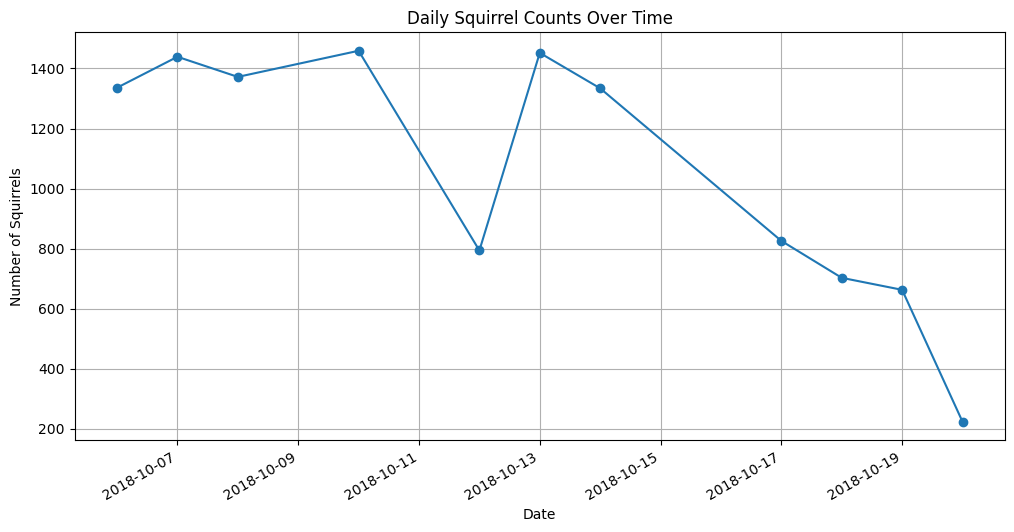

In [148]:
daily_squirrel_counts.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
daily_squirrel_counts['Daily Squirrel Sum'].plot(marker='o', linestyle='-')
plt.title('Daily Squirrel Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Squirrels')
plt.grid(True)
plt.show()

**Draw a pie chart that displays the proportion of squirrels of each age group**

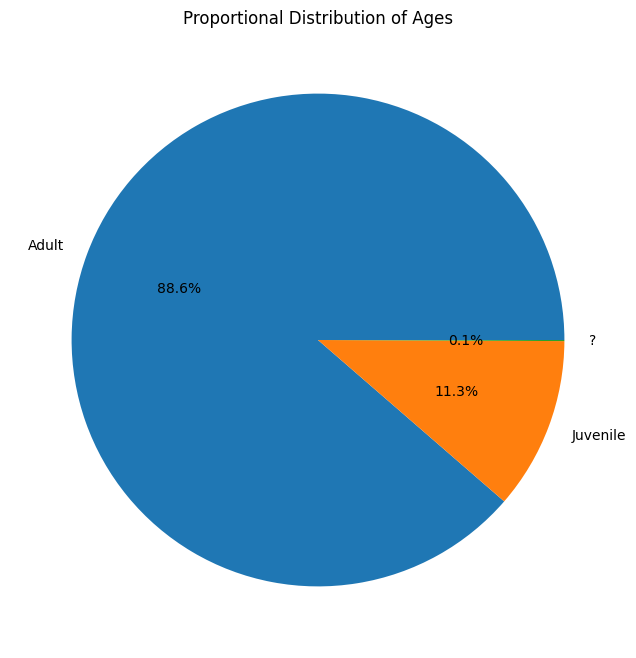

In [149]:
plt.figure(figsize=(8, 8))
df['Age'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportional Distribution of Ages')
plt.ylabel('') 
plt.show()

**Draw a bar chart for the (1.mean 2.standard deviation 3.counts) of squirrels in each hectare based on their primary fur color**

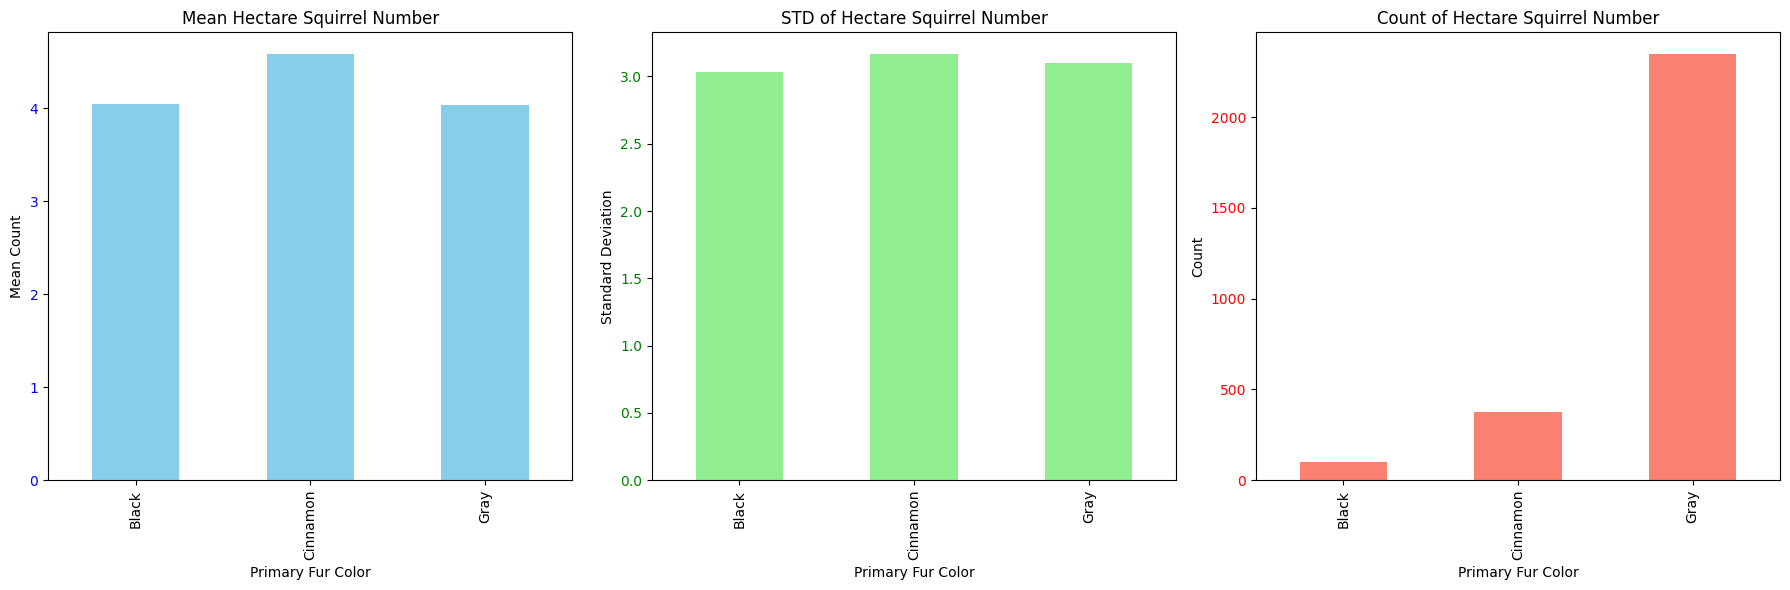

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar chart for the mean
grouped_analysis['mean'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Mean Hectare Squirrel Number')
axes[0].set_ylabel('Mean Count')
axes[0].set_xlabel('Primary Fur Color')
axes[0].tick_params(axis='y', labelcolor='blue')

# Bar chart for the standard deviation
grouped_analysis['std'].plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('STD of Hectare Squirrel Number')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_xlabel('Primary Fur Color')
axes[1].tick_params(axis='y', labelcolor='green')

# Bar chart for the count
grouped_analysis['count'].plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Count of Hectare Squirrel Number')
axes[2].set_ylabel('Count')
axes[2].set_xlabel('Primary Fur Color')
axes[2].tick_params(axis='y', labelcolor='red')

# Adjust the layout so the plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

**Draw a bar chart that displays the number of squirrels that observed performing each action**

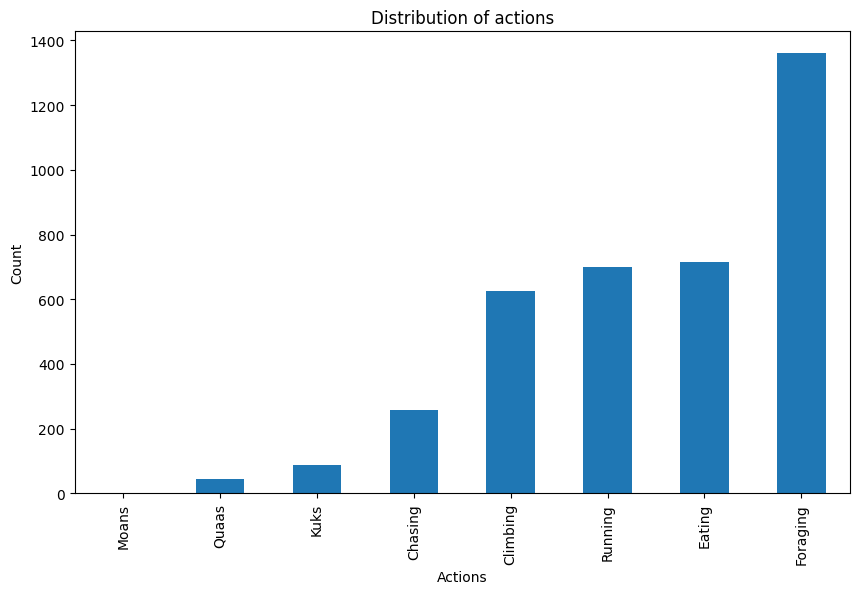

In [151]:
plt.figure(figsize=(10, 6))
action_counts.plot(kind='bar')
plt.title('Distribution of actions')
plt.xlabel('Actions')
plt.ylabel('Count')
plt.show()

**Draw a scatter plot that displays the dirstribution of heights of squirrels when they are observed**

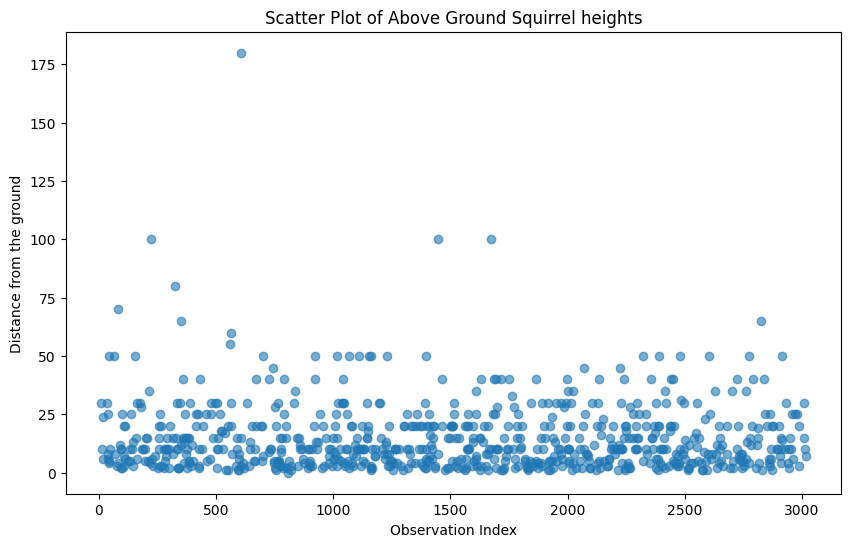

In [152]:
plt.figure(figsize=(10, 6))
plt.scatter(x=above_ground_measurements.index, y=above_ground_measurements, alpha=0.6)

plt.title('Scatter Plot of Above Ground Squirrel heights')
plt.xlabel('Observation Index')
plt.ylabel('Distance from the ground')

plt.show()